In [2]:
import os
import boto3
import pandas as pd
import pymysql
import psycopg2
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [3]:
def get_and_transform_data():
    df=pd.read_csv("ISW_data_for_Feature_analysis.csv")
    df.drop(df.columns[df.columns.str.contains('Unnamed')].tolist(), axis=1, inplace=True)
    dates = [feature for feature in df.columns if "DATE".lower() in feature.lower() and ("EARLIEST".lower() in feature.lower() or "LATEST".lower() in feature.lower())]
    len(dates)
    df.drop(columns=dates, inplace=True)
    df.drop(columns="terminal", inplace=True)
    df.drop(columns="disbursedon_date", inplace=True)
    df.drop(columns="maturedon_date", inplace=True)
    df.drop(columns="closedon_date", inplace=True)
    df.drop(columns="product_id", inplace=True)
    df.drop(columns="expected_maturedon_date", inplace=True)
    df['Dpd'] = df['Dpd'].astype('object')
    
    return df


## No 1

0.7417355371900827
(1936, 398)
(2420,)
(1936,)
(484,)


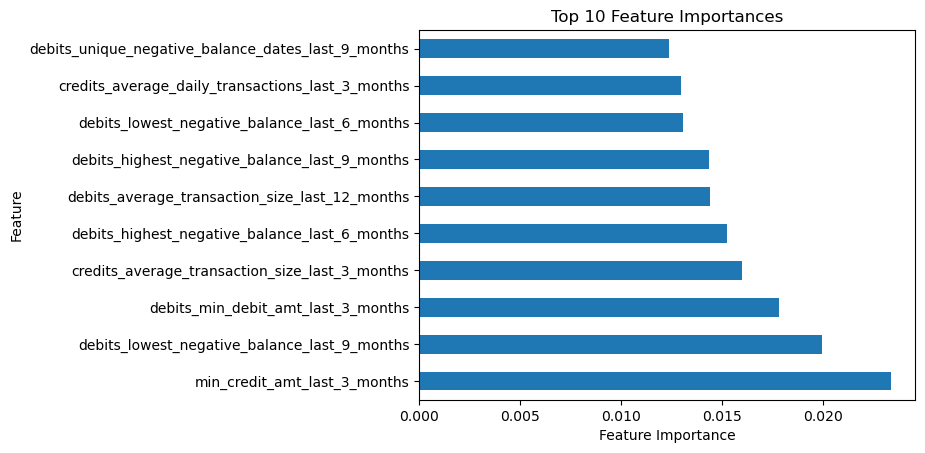

In [4]:
def split_encode_scale(number_of_features):
    df=get_and_transform_data()
    df2 = df.copy()

    # Split the data into features (X) and the target variable (y)
    df2_X = df2.drop('Dpd', axis=1)  
    df2_y = df2['Dpd']


    df2_y_ohe = LabelEncoder()

    df2_y_transformed = df2_y_ohe.fit_transform(df2_y)

    # Split the data into training and testing sets

    df2_Xtrain, df2_Xtest, df2_y_transformed_train, df2_y_transformed_test = train_test_split(
        df2_X, df2_y_transformed, test_size=0.2, random_state=42
    )

    # Scale the features

    df2_scaler = RobustScaler()
    df2_Xtrain_scaled = df2_scaler.fit_transform(df2_Xtrain)
    df2_Xtest_scaled = df2_scaler.transform(df2_Xtest)


    # Fit,train and predict
    df2_model = ExtraTreesClassifier(random_state=42)
    df2_model.fit(df2_Xtrain_scaled, df2_y_transformed_train)
    y_pred = df2_model.predict(df2_Xtest_scaled)
    feature_importance = pd.Series(df2_model.feature_importances_, index=df2_X.columns)
    
    #model accuracy
    accuracy = accuracy_score(df2_y_transformed_test, y_pred)
    print(accuracy)
    print(df2_Xtrain_scaled.shape)
    print(df2_y_transformed.shape)
    print(df2_y_transformed_train.shape)
    print(df2_y_transformed_test.shape)
    
    # Plot the top features
    top_features=feature_importance.nlargest(number_of_features)
   

    feature_importance.nlargest(number_of_features).plot(kind="barh")
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {number_of_features} Feature Importances')
    plt.show()
    
    top_features = feature_importance.nlargest(number_of_features).index.tolist()
    
    top_features = pd.DataFrame({'Selected_Features': top_features}).to_csv("Selected_Feats.csv", index=False)
   
imp=split_encode_scale(10)